# Amazonia360+ Report Tool Queries

This notebook contains the queries used to generate the reports for the Amazonia360+ project.

## Table of Contents

[Report Sections](#report-sections)
1. [General Information](#general-information)
2. [Natural Physical Environment](#natural-physical-environment)


## Setup

### Library import

In [4]:
import json
import pprint
import requests
import dotenv
import os

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

### Utility functions

In [7]:
#Get token from .env file
dotenv.load_dotenv()


True

In [ ]:
def indicator_queries(indicator, geometry, return_geometry='true'):
    """
    Creates a query URL for the ArcGIS service.

    Parameters:
    indicator (str): The dataset name.
    geometry (str): The geometry in JSON format.
    return_geometry (str): Whether to return the geometry. Default is 'true'.

    Returns:
    dict: The data from the query.
    """
    base_url = 'https://services6.arcgis.com/sROlVM0rATIYgC6a/arcgis/rest/services'
    token = os.getenv("ESRI_TOKEN")

    # Create query
    query = (f'{base_url}/{indicator}/FeatureServer/0/query?f=json&geometry={geometry}'
             f'&outFields=*&returnGeometry={return_geometry}&spatialRel=esriSpatialRelIntersects'
             f'&where=FID is not null&geometryType=esriGeometryPolygon&inSR=102100&outSR=4326'
             f'&token={token}')

    # Make request
    r = requests.get(query)
    data = json.loads(r.text)

    return data

<a id='report-sections'></a>
## Report Sections

<a id='general-information'></a>
### 1. General Information

`AFP_CAPITALES_ADMIN`  
`AFP_Areas_protegidas`  
`AFP_Tierras_indigenas`  
`AFP_Grandes_cuencas_hidrograficas`  
`ACU_KnowledgeDB` (publicaciones relacionadas)  

Population -> Raster zonal stats  


<a id='natural-physical-environment'></a>
### 2. Natural Physical Environment

`AFP_Tipos_climaticos_KOEPEN`  
`AFP_Biomas`  

Elevation -> Raster zonal stats  
Land cover -> Raster zonal stats

**Biomes by type**

In [ ]:
indicator = 'AFP_Biomas' # Add dataset name
geometry='{"rings":[[[-7078236.688350331,-2235196.819507535],[-7356543.9083365835,-2087673.354917184],[-7709912.290098859,-1602412.880848871],[-7526998.4814124815,-1468648.0813498483],[-7056299.26123249,-1305340.3704186128],[-5983123.384108901,-1289250.3759645876],[-5224180.130265588,-1432493.3669709698],[-5609269.878766203,-1817200.9303301596],[-6030820.089758838,-1946073.7600189322],[-6459249.633297138,-1800346.5655932822],[-6802795.85692477,-1808525.3276197943],[-6769048.908936875,-2030574.8947881726],[-7078236.688350331,-2235196.819507535]]]}'
return_geometry='true'
data = indicator_queries(indicator, geometry, return_geometry)

In [89]:
polygon = json.loads(geometry)['rings'][0]
gdf_poly = gpd.GeoDataFrame([{"name": "polygon"}], geometry=[Polygon(polygon)])
# Set CRS to ESRI:102100
gdf_poly.set_crs(epsg=102100, inplace=True)

# Reproject to EPSG:4326
gdf_poly = gdf_poly.to_crs(epsg=4326)
gdf_poly

,name,geometry
0,polygon,"POLYGON ((-63.58488 -19.68030, -66.08496 -18.4..."


In [95]:
# Extract attributes and geometry
attributes = [item['attributes'] for item in data['features']]
geometry = [Polygon(item['geometry']['rings'][0]) for item in data['features']]

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(attributes, geometry=geometry)

# Set CRS to ESRI:102100
#gdf.set_crs(epsg=102100, inplace=True)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to EPSG:4326
#gdf = gdf.to_crs(epsg=4326)

gdf

,FID,BIOME,BIOMADES,Shape__Area,Shape__Length,geometry
0,1,1,Tropical and Subtropical Moist Broadleaf Forests,6.740088e+12,6.596722e+07,"POLYGON ((-62.16851 9.93850, -62.18296 9.93627..."


In [ ]:
gdf['area'] = gdf['geometry'].area
gdf['area_shape_pct'] = gdf['Shape__Area'] / gdf['Shape__Area'].sum() * 100
gdf['area_pct'] = gdf['area'] / gdf['area'].sum() * 100
gdf

/var/folders/wf/_wlxc6cn5js4hh3j7j6x28f80000gn/T/ipykernel_7127/2697238990.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf['geometry'].area


,FID,BIOME,BIOMADES,Shape__Area,Shape__Length,geometry,area
0,1,1,Tropical and Subtropical Moist Broadleaf Forests,6.740088e+12,6.596722e+07,"POLYGON ((-62.16851 9.93850, -62.18296 9.93627...",0.000017
1,2,2,Tropical and Subtropical Dry Broadleaf Forests,2.687076e+11,1.399060e+07,"POLYGON ((-73.95417 3.35417, -73.95083 3.34917...",0.193485
2,3,7,"Tropical and Subtropical Grasslands, Savannas ...",1.337588e+12,4.513371e+07,"POLYGON ((-62.20739 8.64443, -62.24595 8.60665...",0.002697
3,4,9,Flooded Grasslands and Savannas,6.400192e+10,4.039980e+06,"POLYGON ((-62.07857 9.87582, -62.07703 9.87479...",0.005688
4,5,10,Montane Grasslands and Shrublands,1.260113e+11,2.159517e+07,"POLYGON ((-74.77648 2.94274, -74.77165 2.93829...",0.001231


In [86]:
gdf_poly['area'] = gdf_poly['geometry'].area
gdf_poly

/var/folders/wf/_wlxc6cn5js4hh3j7j6x28f80000gn/T/ipykernel_7127/586741985.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_poly['area'] = gdf_poly['geometry'].area


,name,geometry,area
0,polygon,"POLYGON ((-63.58488 -19.68030, -66.08496 -18.4...",103.825023


<Axes: >

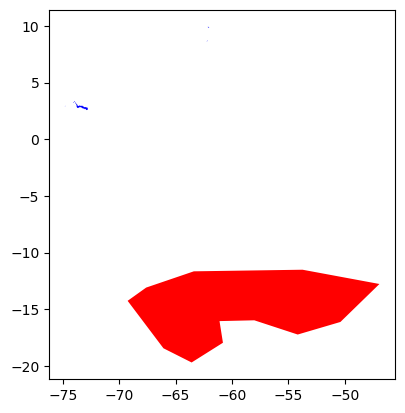

In [93]:
fig, ax = plt.subplots()
gdf_poly.plot(ax=ax, color='r')
gdf.plot(ax=ax, color='blue')